<a href="https://colab.research.google.com/github/Kavya-1708/creditcard_frauddetection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person named on it to charge purchases and services to his linked account charges which will be debited regularly.
#Nowadays, card data is read by ATMs, swiping machines, store readers, banks, and online transactions.
#Each card has a unique card number which is very important, its security mainly relies on the physical security of the card and also the privacy of the credit card number.
#There is a rapid growth in credit card transactions which has led to substantial growth in scam cases.
#Credit card fraud is expanding heavily because fraud financial loss is increasing drastically.
#Multiple data mining and statistical techniques are used to catch fraud.
#Therefore the detection of fraud using efficient and secured methods are very important.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
df= pd.read_csv(r"/content/creditcard.csv.crdownload")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [29]:
# find null values
df.isnull().sum().sum()

np.int64(19)

In [30]:
# drop null values
df.dropna(inplace=True)

# Confirm nulls are gone
print("✅ Null values removed from all columns:")
print(df.isnull().sum())

✅ Null values removed from all columns:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [33]:
# Calculate the no. of fraud transactions

fraud_col = 'Class' if 'Class' in df.columns else 'isFraud'

genuine = df[df[fraud_col] == 0]
fraud = df[df[fraud_col] == 1]

num_genuine = len(genuine)
num_fraud = len(fraud)
total = len(df)

print(f"\n✅ Number of Genuine Transactions: {num_genuine}")
print(f"✅ Number of Fraud Transactions: {num_fraud}")
print(f"📊 Percentage of Fraud: {(num_fraud / total) * 100:.4f}%")


✅ Number of Genuine Transactions: 11615
✅ Number of Fraud Transactions: 49
📊 Percentage of Fraud: 0.4201%


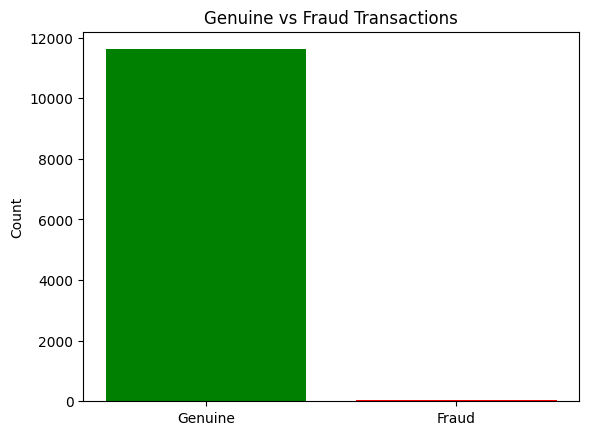

In [34]:
# display the graph
plt.bar(['Genuine', 'Fraud'], [num_genuine, num_fraud], color=['green', 'red'])
plt.title("Genuine vs Fraud Transactions")
plt.ylabel("Count")
plt.show()

In [35]:
# Standard scaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])

In [36]:
# Train the dataset
X = df.drop([fraud_col], axis=1)
y = df[fraud_col]

In [37]:
X = X.select_dtypes(include=['float64', 'int64'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree classifier

In [40]:
# Train models
dt = DecisionTreeClassifier(random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [41]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [53]:
y_pred_dt = dt.predict(X_test)
y_pred_dt # predict the model

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
# classification report
from sklearn.metrics import classification_report

print("\n📊 Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


📊 Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500



In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix

print("🧾 Confusion Matrix (DT):\n", confusion_matrix(y_test, y_pred_dt))

🧾 Confusion Matrix (DT):
 [[3483    1]
 [   2   14]]


In [54]:
acc_dt = dt.score(X_test, y_test)
acc_dt # accuracy of the model

0.9991428571428571

# Random forest classifier

In [57]:
# Random forest
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf.predict(X_test)
y_pred_rf # predict the model

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500



In [62]:
print("🧾 Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))

🧾 Confusion Matrix (RF):
 [[3483    1]
 [   2   14]]


In [60]:
# accuracy of the model
acc_rf = rf.score(X_test, y_test)
acc_rf

0.9991428571428571

# Which model is best

In [63]:
best_model = "Random Forest" if acc_rf > acc_dt else "Decision Tree"
print(f"\n✅ Best Performing Model: {best_model}")


✅ Best Performing Model: Decision Tree
